In [7]:
pip install tensorflow

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 21.30 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [10]:
test_data_dir='/content/dog-cat-full-dataset/data/test'
train_data_dir='/content/dog-cat-full-dataset/data/train'

In [11]:
img_width=32
img_height=32
batch_size=20

In [12]:
datagen=ImageDataGenerator(rescale=1./255)

In [13]:
train_generator=datagen.flow_from_directory(directory=train_data_dir,target_size=(img_width,img_height),classes=['dogs','cats'],class_mode='binary',batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [14]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [15]:
len(train_generator)
#전체 이미지개수 / batch size

1000

In [16]:
validation_generator=datagen.flow_from_directory(directory=test_data_dir,target_size=(img_width,img_height),classes=['dogs','cats'],class_mode='binary',batch_size=batch_size)

Found 5000 images belonging to 2 classes.


simple CNN

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#image generator 사용하기 때문에 fit_generator 사용
hist=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/5
1000/1000 [==============================] - 98s 98ms/step - loss: 0.6984 - accuracy: 0.5082 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 2/5
1000/1000 [==============================] - 97s 97ms/step - loss: 0.6907 - accuracy: 0.5102 - val_loss: 0.6882 - val_accuracy: 0.5004
Epoch 3/5
1000/1000 [==============================] - 96s 96ms/step - loss: 0.6808 - accuracy: 0.5514 - val_loss: 0.6695 - val_accuracy: 0.5918
Epoch 4/5
1000/1000 [==============================] - 98s 98ms/step - loss: 0.6341 - accuracy: 0.6431 - val_loss: 0.6456 - val_accuracy: 0.6430
Epoch 5/5
1000/1000 [==============================] - 97s 97ms/step - loss: 0.5531 - accuracy: 0.7171 - val_loss: 0.5479 - val_accuracy: 0.7144


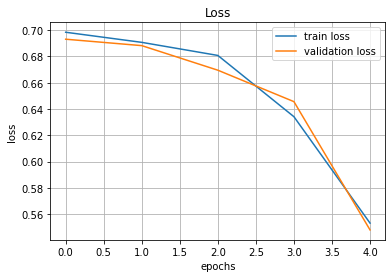

In [ ]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

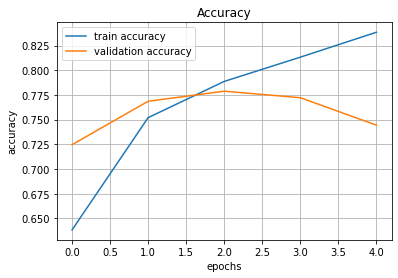

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

##first 3 blocks of VGG16


In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)            

In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/5
1000/1000 [==============================] - 198s 198ms/step - loss: 0.6310 - accuracy: 0.6383 - val_loss: 0.5408 - val_accuracy: 0.7246
Epoch 2/5
1000/1000 [==============================] - 199s 199ms/step - loss: 0.5103 - accuracy: 0.7520 - val_loss: 0.4829 - val_accuracy: 0.7686
Epoch 3/5
1000/1000 [==============================] - 201s 201ms/step - loss: 0.4547 - accuracy: 0.7887 - val_loss: 0.4658 - val_accuracy: 0.7788
Epoch 4/5
1000/1000 [==============================] - 197s 197ms/step - loss: 0.4084 - accuracy: 0.8133 - val_loss: 0.4997 - val_accuracy: 0.7722
Epoch 5/5
1000/1000 [==============================] - 199s 199ms/step - loss: 0.3661 - accuracy: 0.8385 - val_loss: 0.5975 - val_accuracy: 0.7444


Dropout + Batchnormalization

In [17]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [18]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
hist=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1000/1000 [==============================] - 219s 219ms/step - loss: 0.6807 - accuracy: 0.6306 - val_loss: 0.6026 - val_accuracy: 0.6662
Epoch 2/5
1000/1000 [==============================] - 220s 220ms/step - loss: 0.6122 - accuracy: 0.6823 - val_loss: 0.6750 - val_accuracy: 0.6128
Epoch 3/5
1000/1000 [==============================] - 220s 220ms/step - loss: 0.5665 - accuracy: 0.7169 - val_loss: 0.4989 - val_accuracy: 0.7572
Epoch 4/5
1000/1000 [==============================] - 220s 220ms/step - loss: 0.5345 - accuracy: 0.7374 - val_loss: 0.5493 - val_accuracy: 0.7366
Epoch 5/5
1000/1000 [==============================] - 219s 219ms/step - loss: 0.5036 - accuracy: 0.7548 - val_loss: 0.4733 - val_accuracy: 0.7694
